In [2]:
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import traceback

def print_progress(message):
    print(f"[{time.strftime('%Y-%m-%d %H:%M:%S')}] {message}")


file_path = '/Users/saverahayat/Desktop/merged_file_mlbgames_weather.csv'  


try:
    data = pd.read_csv(file_path)
    print_progress("Data loaded successfully.")
except FileNotFoundError:
    print_progress(f"File not found: {file_path}")


data['Slugging Percentage'] = data['Total Bases'] / data['At Bats']
print_progress("Feature engineering completed.")


data = data.dropna(subset=['Slugging Percentage'])
print_progress("Dropped rows with missing target values.")


features = data[['temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'pres', 'Location', 'Team', 'Opponent']]
target = data['Slugging Percentage']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print_progress("Train-test split done.")


preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), ['temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'pres']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Location', 'Team', 'Opponent'])
    ])
print_progress("Preprocessor created.")


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])
print_progress("Pipeline created.")


param_grid = {
    'regressor__n_estimators': [100],
    'regressor__max_depth': [10]
}
print_progress("Simplified hyperparameter grid defined.")


grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
print_progress("Grid search initialized.")

try:
    start_time = time.time()
    print_progress("Starting grid search...")
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    print_progress(f"Grid search completed in {end_time - start_time:.2f} seconds.")

    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print_progress(f'Mean Squared Error: {mse}')
except Exception as e:
    print_progress("An error occurred during the grid search fit process.")
    traceback.print_exc()


[2024-08-07 21:20:35] Data loaded successfully.
[2024-08-07 21:20:35] Feature engineering completed.
[2024-08-07 21:20:35] Dropped rows with missing target values.
[2024-08-07 21:20:35] Train-test split done.
[2024-08-07 21:20:35] Preprocessor created.
[2024-08-07 21:20:35] Pipeline created.
[2024-08-07 21:20:35] Simplified hyperparameter grid defined.
[2024-08-07 21:20:35] Grid search initialized.
[2024-08-07 21:20:35] Starting grid search...
[2024-08-07 21:21:01] Grid search completed in 25.38 seconds.
[2024-08-07 21:21:01] Mean Squared Error: 0.02532984252943524


Data loaded successfully.
         Date   Time   temp  dwpt  rhum   wdir  wspd    pres Visitor Home  \
0  2013-03-31  19:00  80.60  18.0  58.0  200.0  18.4  1012.7     TEX  HOU   
1  2013-03-31  19:00  80.60  18.0  58.0  200.0  18.4  1012.7     TEX  HOU   
2  2013-04-01  19:00  60.08   2.7  42.0  300.0  29.5  1007.7     MIA  WAS   
3  2013-04-01  19:00  60.08   2.7  42.0  300.0  29.5  1007.7     MIA  WAS   
4  2013-04-01  19:00  60.98   5.1  48.0  270.0  33.5  1002.7     SDN  NYN   

           Location  Elevation                  Team              Opponent  \
0  Minute Maid Park          6        Houston Astros         Texas Rangers   
1  Minute Maid Park          6         Texas Rangers        Houston Astros   
2    Nationals Park          2  Washington Nationals         Miami Marlins   
3    Nationals Park          2         Miami Marlins  Washington Nationals   
4    Yankee Stadium          4      New York Yankees        Boston Red Sox   

   At Bats  Singles  Doubles  Triples  Hom

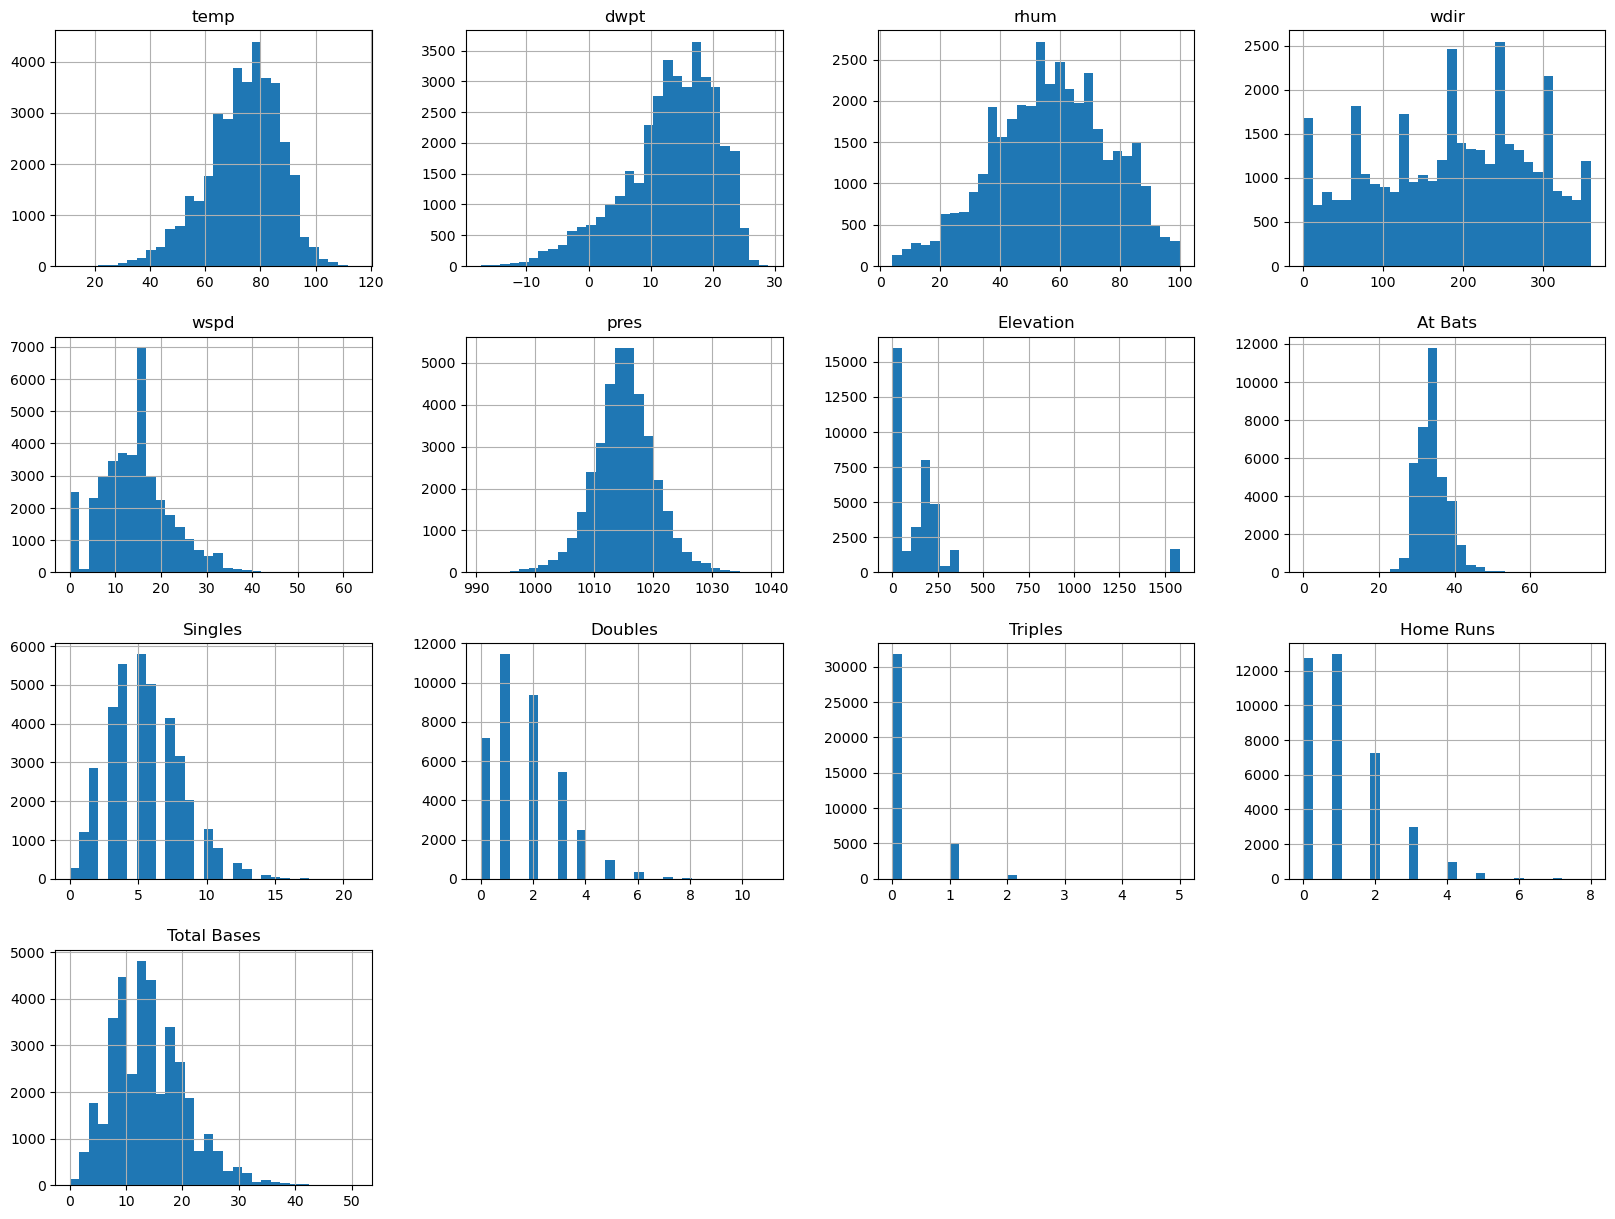

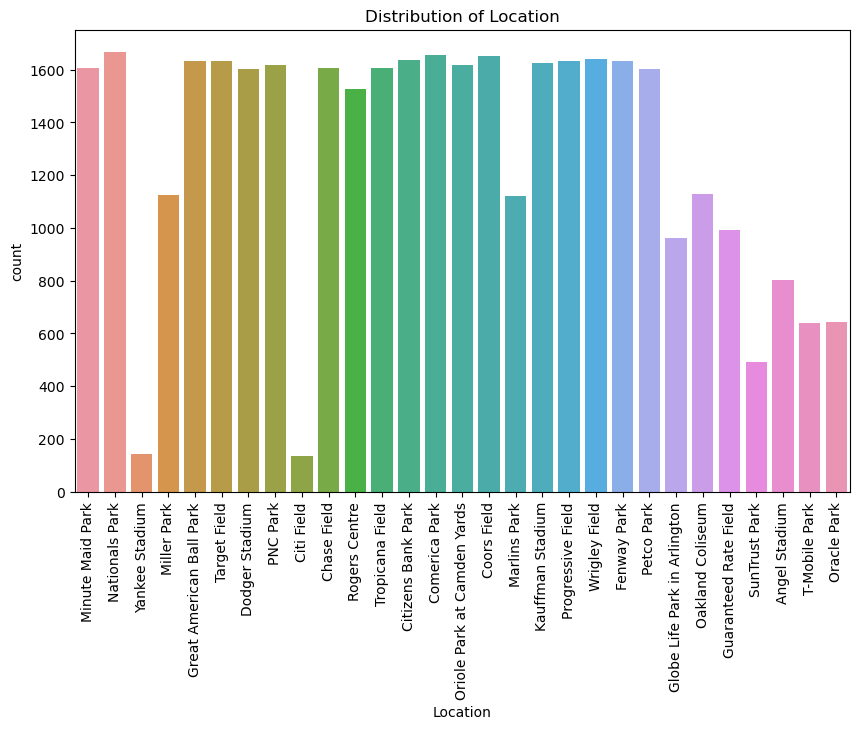

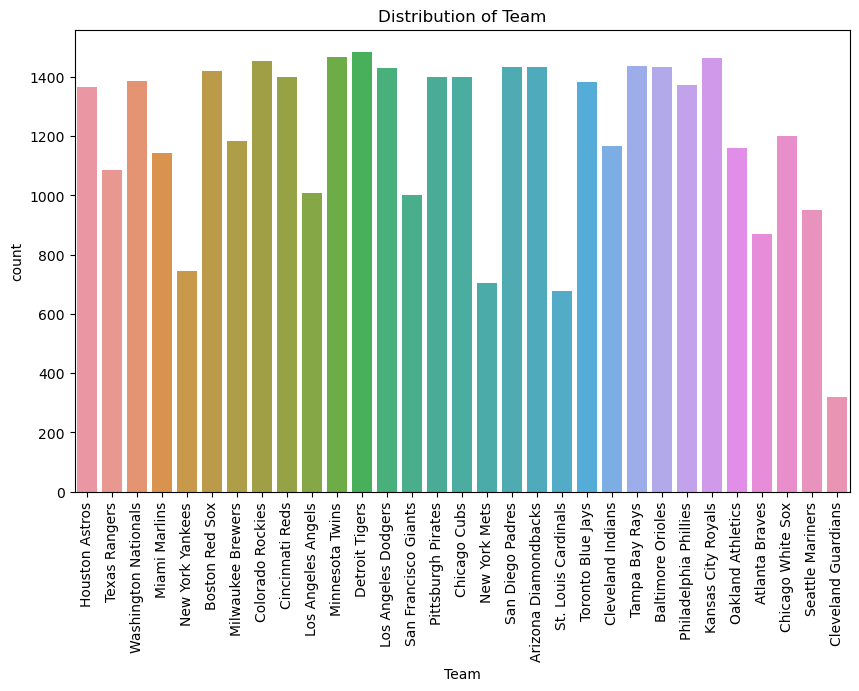

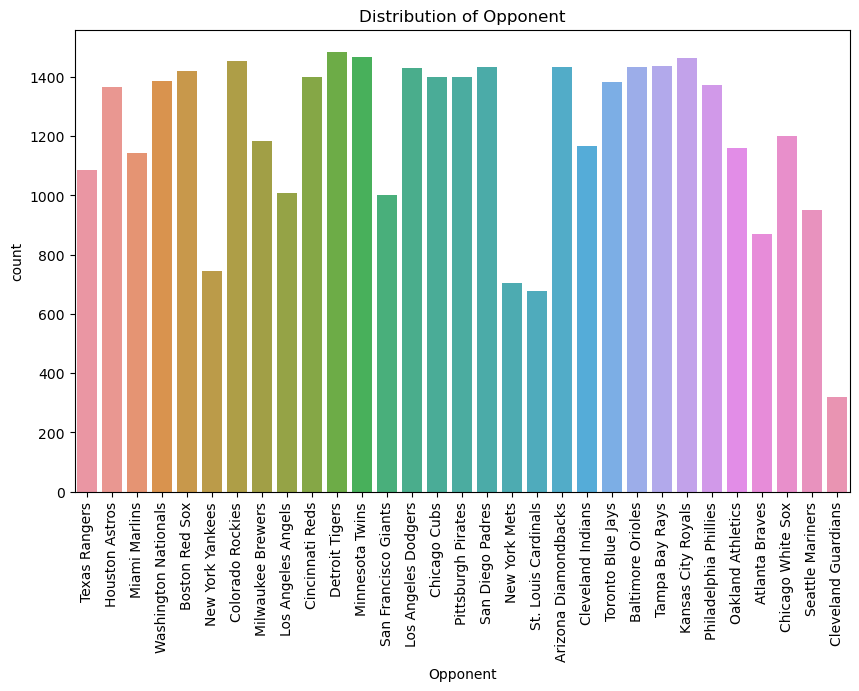

ValueError: could not convert string to float: '2013-03-31'

In [3]:

import seaborn as sns
import matplotlib.pyplot as plt


file_path = '/Users/saverahayat/Desktop/merged_file_mlbgames_weather.csv'  


try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found: {file_path}")


print(data.head())


print(data.describe())


print(data.isnull().sum())


data.hist(bins=30, figsize=(20, 15))
plt.show()


categorical_features = ['Location', 'Team', 'Opponent']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()


corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


numerical_features = ['temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'pres']
target = 'Slugging Percentage'
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=feature, y=target)
    plt.title(f'{feature} vs {target}')
    plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y=target)
plt.title(f'Distribution of {target}')
plt.show()


[2024-08-08 09:02:49] Data loaded successfully.
Original Mean Slugging Percentage: 0.41383728076767806
[2024-08-08 09:02:49] Feature engineering completed.
[2024-08-08 09:02:49] Dropped rows with missing target values.
[2024-08-08 09:02:49] Train-test split done.
[2024-08-08 09:02:49] Preprocessor created.
[2024-08-08 09:02:49] Pipeline created.
[2024-08-08 09:02:49] Simplified hyperparameter grid defined.
[2024-08-08 09:02:49] Grid search initialized.
[2024-08-08 09:02:49] Starting grid search...
[2024-08-08 09:03:14] Grid search completed in 25.27 seconds.
[2024-08-08 09:03:14] Mean Squared Error: 0.025300487194532737
Predicted Mean Slugging Percentage: 0.40437706258933487
Actual Mean Slugging Percentage: 0.40621625069259637


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


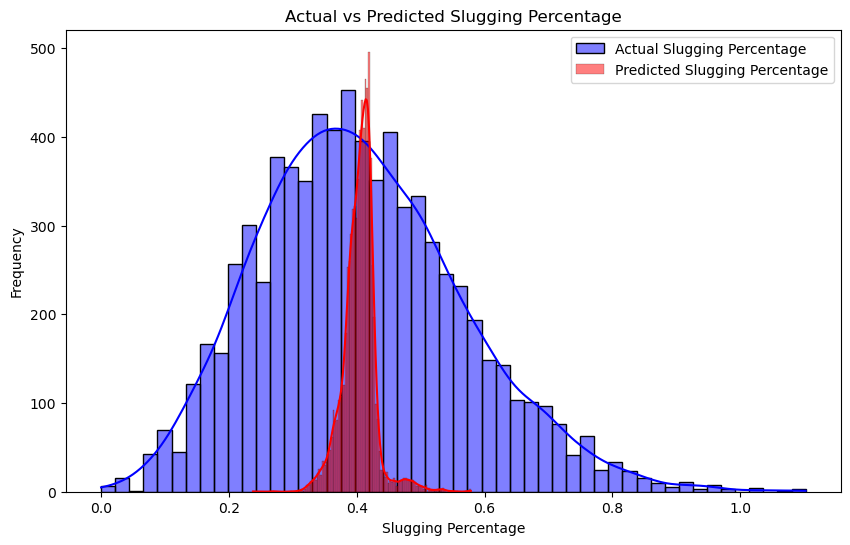

[2024-08-08 09:03:14] An error occurred during the grid search fit process.


Traceback (most recent call last):
  File "/var/folders/3j/gwy5vvz13z77qss5x5kg_rkh0000gn/T/ipykernel_53276/1445315848.py", line 109, in <module>
    pearson_corr, _ = pearsonr(data[feature], data['Slugging Percentage'])
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py", line 4837, in pearsonr
    normxm = linalg.norm(xm)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/scipy/linalg/_misc.py", line 146, in norm
    a = np.asarray_chkfinite(a)
        ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py", line 630, in asarray_chkfinite
    raise ValueError(
ValueError: array must not contain infs or NaNs


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr, spearmanr
import time
import traceback

def print_progress(message):
    print(f"[{time.strftime('%Y-%m-%d %H:%M:%S')}] {message}")


file_path = '/Users/saverahayat/Desktop/merged_file_mlbgames_weather.csv' 


try:
    data = pd.read_csv(file_path)
    print_progress("Data loaded successfully.")
except FileNotFoundError:
    print_progress(f"File not found: {file_path}")
#everything above here is for me to target my kernel problems, ignore
# Original mean slugging percentage
original_mean_slugging = data['Total Bases'].sum() / data['At Bats'].sum()
print(f"Original Mean Slugging Percentage: {original_mean_slugging}")

# FE: Calculate slugging percentage
data['Slugging Percentage'] = data['Total Bases'] / data['At Bats']
print_progress("Feature engineering completed.")

# Missing target val
data = data.dropna(subset=['Slugging Percentage'])
print_progress("Dropped rows with missing target values.")

#features to target
features = data[['temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'pres', 'Location', 'Team', 'Opponent']]
target = data['Slugging Percentage']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print_progress("Train-test split done.")

# Column Transformer for Preprocessing, including imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), ['temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'pres']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Location', 'Team', 'Opponent'])
    ])
print_progress("Preprocessor created.")

# Pipeline with Random Forest and Hyperparameter Tuning
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])
print_progress("Pipeline created.")

# Hyperparameter Grid - Simplified for quicker testing
param_grid = {
    'regressor__n_estimators': [100],
    'regressor__max_depth': [10]
}
print_progress("Simplified hyperparameter grid defined.")

# Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
print_progress("Grid search initialized.")

try:
    start_time = time.time()
    print_progress("Starting grid search...")
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    print_progress(f"Grid search completed in {end_time - start_time:.2f} seconds.")

    # Best Model Evaluation
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print_progress(f'Mean Squared Error: {mse}')

    # Calculate mean slugging percentage of predictions
    predicted_mean_slugging = y_pred.mean()
    actual_mean_slugging = y_test.mean()
    print(f"Predicted Mean Slugging Percentage: {predicted_mean_slugging}")
    print(f"Actual Mean Slugging Percentage: {actual_mean_slugging}")

    # Visualize the actual vs. predicted slugging percentage
    plt.figure(figsize=(10, 6))
    sns.histplot(y_test, color="blue", label="Actual Slugging Percentage", kde=True)
    sns.histplot(y_pred, color="red", label="Predicted Slugging Percentage", kde=True)
    plt.legend()
    plt.title('Actual vs Predicted Slugging Percentage')
    plt.xlabel('Slugging Percentage')
    plt.ylabel('Frequency')
    plt.show()
    
    # Pearson and Spearman correlations for each feature with the target variable
    numerical_features = ['temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'pres']
    for feature in numerical_features:
        pearson_corr, _ = pearsonr(data[feature], data['Slugging Percentage'])
        spearman_corr, _ = spearmanr(data[feature], data['Slugging Percentage'])
        print(f"{feature} - Pearson Correlation: {pearson_corr:.3f}, Spearman Correlation: {spearman_corr:.3f}")
    
except Exception as e:
    print_progress("An error occurred during the grid search fit process.")
    traceback.print_exc()
